# 觀察資料分布
* YELP
    * 50 review above 
    * join business, check-in and tips

# Import

In [2]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df_l = pd.read_pickle("/home/adam/Steph_C/my_thesis/data/ORI_by_postal_code_L.pkl")
df = pd.read_pickle("/home/adam/Steph_C/my_thesis/data/ORI_by_postal_code.pkl")
df_p = pd.read_pickle("/home/adam/Steph_C/my_thesis/data/ORI_by_postal_code_L_dropped.pkl")
all_df = pd.read_pickle('../Data/yelp/restaurant_only.pkl')

In [4]:
df.shape , df_l.shape

((250798, 20), (358897, 20))

In [5]:
len(Counter(df.name)), len(Counter(df_l.name))

(565, 1070)

# 個資料集比較
* 找出是否有餐廳在偏鄉地點，偏鄉 filter by 餐廳數。

In [6]:
len(Counter(df.postal_code)), len(Counter(df_l.postal_code))

(356, 516)

In [30]:
# Count postal_code's restaurant number
cnt = 0
postal_res_count ={}
postal_res_count_l ={}
postal_res_count_all = {}

for i in Counter(df.postal_code):
    tmp = df[df.postal_code==i]
    postal_res_count[i]=len(Counter(tmp.name))

for i in Counter(df_l.postal_code):
    tmp = df_l[df_l.postal_code==i]
    postal_res_count_l[i]=len(Counter(tmp.name))
    
for i in Counter(all_df.postal_code):
    tmp = all_df[all_df.postal_code==i]
    postal_res_count_all[i]=len(Counter(tmp.name))

The total no. of postal codes : 356
The total no. of postal codes with restaurant less than 5 : 254


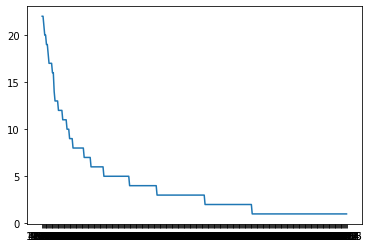

In [27]:
print(f'The total no. of postal codes : {len(postal_res_count)}')
print(f'The total no. of postal codes with restaurant less than 5 : {len([i for i in postal_res_count.values() if i<5])}')

lists = sorted(postal_res_count.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()


The total no. of postal codes : 516
The total no. of postal codes with restaurant less than 5 : 275


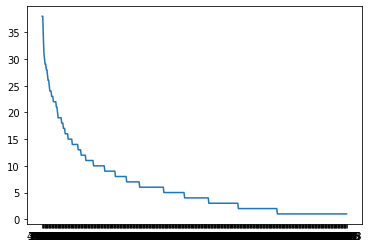

In [28]:
print(f'The total no. of postal codes : {len(postal_res_count_l)}')
print(f'The total no. of postal codes with restaurant less than 5 : {len([i for i in postal_res_count_l.values() if i<5])}')

lists = sorted(postal_res_count_l.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()


The total no. of postal codes : 1081
The total no. of postal codes with restaurant less than 5 : 513


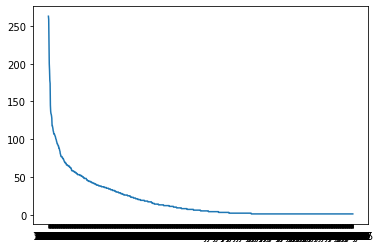

In [31]:
print(f'The total no. of postal codes : {len(postal_res_count_all)}')
print(f'The total no. of postal codes with restaurant less than 5 : {len([i for i in postal_res_count_all.values() if i<5])}')

lists = sorted(postal_res_count_all.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()


In [47]:
# 每間餐店分店差多遠
cnt =0
res_dist ={}
for i in Counter(df_p.name):
    tmp = df_p[df_p.name==i].postal_code.astype(int)
    res_dist[i]=max(tmp)-min(tmp)
    if max(tmp)-min(tmp) <= 1000:
        cnt+=1

In [ ]:
lists = sorted(res_dist.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [48]:
cnt

653

In [46]:
print(len(Counter(df_p.name)))

1053
